In [7]:
import numpy as np
import warnings
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt

from sklearn.linear_model import SGDClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score, roc_curve, precision_recall_curve, classification_report
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

In [2]:
wine = pd.read_csv("~/ucare-summer2020/datasets/winequality-white.csv", sep=";")
wine

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
...,...,...,...,...,...,...,...,...,...,...,...,...
4893,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6
4894,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5
4895,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6
4896,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7


In [3]:
X = wine.drop(columns=['quality'])
y = wine['quality']
y = y > 5
y = y.astype(int)

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [5]:
attributes = ["fixed acidity", "volatile acidity", "citric acid", "residual sugar", "chlorides",
              "free sulfur dioxide", "total sulfur dioxide", "density", "pH", "sulphates", "alcohol"]


In [57]:
poly_features = PolynomialFeatures(degree=2, include_bias=False)

eff_X = X.loc[:, ["alcohol", "density"]]
eff_X_test = X_test.loc[:, ["alcohol", "density"]]
eff_X_train = X_train.loc[:, ["alcohol", "density"]]

eff_X_train_poly = poly_features.fit_transform(eff_X_train)
eff_X_test_poly = poly_features.fit_transform(eff_X_test)

In [ ]:
def decision_boundary_equation_based(clf, X, column1, column2):
    X = X[[column1, column2]]
    xmin, xmax = X.min() - 0.01, X.max() + 0.01
    
    w = clf.coef_[0] # We use index 0 to return a list from a 1 x 2 coef_ matrix
    b = clf.intercept_[0]
    x1 = np.linspace(xmin, xmax, 100)
    decision_boundary = -(b + w[0]*x1)/w[1]
    plt.plot(x1, decision_boundary, "k--", linewidth=3)

In [ ]:
def plot_boundary_clf(clf, eff_X, y, column1, column2):
    eff_X = pd.DataFrame(eff_X)
    index = eff_X_train.index
    eff_X = temp.set_index(index)
    
    plt.figure(figsize=(12, 6))
    
    plt.plot(eff_X[y==0].iloc[:,column1], eff_X[y==0].iloc[:,column2], "bs")
    plt.plot(eff_X[y==1].iloc[:,column1], eff_X[y==1].iloc[:,column2], "g^")
    
    xmin, xmax = eff_X.min() - 0.01, eff_X.max() + 0.01
    plt.axis([xmin[column1], xmax[column1], xmin[column2], xmax[column2]])
    plt.annotate('Bad Wine', xy=(0.85, 0.95), xycoords='axes fraction', color="b")
    plt.annotate('Good Wine', xy=(0.85, 0.85), xycoords='axes fraction', color="g")
    plt.xlabel("Feature 1", fontsize=14)
    plt.ylabel("Feature 2", fontsize=14)
    plt.title("Polynomial Features Plot", fontsize=16)
    plt.show()

In [61]:
param_grid = {'solver': ['liblinear', 'newton-cg', 'lbfgs', 'sag', 'saga'],
             'tol': [1e-4, 1e-5], 'max_iter': [3000, 5000, 10000],
             'C': [0.0001, 0.001, 0.1, 0.5, 1]}
lg_reg = LogisticRegression()
lg_reg_cv = GridSearchCV(lg_reg, param_grid, scoring='accuracy',
                        cv=3, verbose=1, n_jobs=-1)
lg_reg_cv.fit(eff_X_train_poly, y_train)
params_optimal = lg_reg_cv.best_params_

print("Optimal Hyperparameter Values: ", params_optimal)
print("\n")

Fitting 3 folds for each of 150 candidates, totalling 450 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    5.8s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:   33.2s
[Parallel(n_jobs=-1)]: Done 442 tasks      | elapsed:  1.5min


Optimal Hyperparameter Values:  {'C': 1, 'max_iter': 3000, 'solver': 'liblinear', 'tol': 1e-05}




[Parallel(n_jobs=-1)]: Done 450 out of 450 | elapsed:  1.7min finished


In [62]:
lg_reg_clf = LogisticRegression(**params_optimal)
lg_reg_clf.fit(eff_X_train_poly, y_train)

LogisticRegression(C=1, max_iter=3000, solver='liblinear', tol=1e-05)

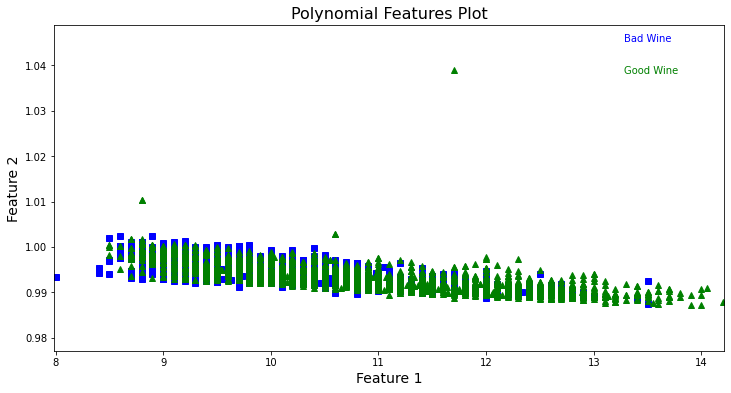

,0,1,2,3,4
0,12.4,0.99272,153.76,12.309728,0.985493
1,9.5,0.99680,90.25,9.469600,0.993610
2,11.1,0.99268,123.21,11.018748,0.985414
3,10.8,0.99315,116.64,10.726020,0.986347
4,10.4,0.99976,108.16,10.397504,0.999520
...,...,...,...,...,...
3913,9.9,0.99418,98.01,9.842382,0.988394
3914,9.4,0.99560,88.36,9.358640,0.991219
3915,11.4,0.99129,129.96,11.300706,0.982656
3916,10.6,0.99567,112.36,10.554102,0.991359


In [167]:
plot_boundary_clf(lg_reg_clf, eff_X_train_poly, y_train, 0, 1)
pd.DataFrame(eff_X_train_poly)

In [231]:
def polynomial_report(feature1, feature2):
    poly_features = PolynomialFeatures(degree=2, include_bias=False)

    eff_X = X.loc[:, [feature1, feature2]]
    eff_X_test = X_test.loc[:, [feature1, feature2]]
    eff_X_train = X_train.loc[:, [feature1, feature2]]

    eff_X_train_poly = poly_features.fit_transform(eff_X_train)
    eff_X_test_poly = poly_features.fit_transform(eff_X_test)
    
    param_grid = {'solver': ['liblinear', 'newton-cg', 'lbfgs', 'sag', 'saga'],
             'tol': [1e-4, 1e-5], 'max_iter': [3000, 5000, 10000],
             'C': [0.0001, 0.001, 0.1, 0.5, 1]}
    lg_reg = LogisticRegression()
    lg_reg_cv = GridSearchCV(lg_reg, param_grid, scoring='accuracy',
                            cv=3, verbose=1, n_jobs=-1)
    lg_reg_cv.fit(eff_X_train_poly, y_train)
    params_optimal = lg_reg_cv.best_params_

    print("Optimal Hyperparameter Values: ", params_optimal)
    print("\n")
    
    lg_reg_clf = LogisticRegression(**params_optimal)
    lg_reg_clf.fit(eff_X_train_poly, y_train)
    
    plot_boundary_clf(lg_reg_clf, eff_X)
    
    y_train_predicted = lg_reg_clf.predict(eff_X_train_poly)
    y_test_predicted = lg_reg_clf.predict(eff_X_test_poly)
    print("\nTrain Accuracy: ", np.mean(y_train_predicted == y_train))
    
    print("-----------------------------------------")
    print("\nTest Accuracy: ", np.mean(y_test_predicted == y_test))
    print("\nTest Confusion Matrix:")
    print(confusion_matrix(y_test, y_test_predicted))


    precision_test = precision_score(y_test, y_test_predicted) 
    print("\nTest Precision = %f" % precision_test)

    recall_test = recall_score(y_test, y_test_predicted)
    print("Test Recall = %f" % recall_test)


    f1_test = f1_score(y_test, y_test_predicted)
    print("Test F1 Score = %f" % f1_test)


    print("\nClassification Report:")
    print(classification_report(y_test, y_test_predicted))

In [202]:
def decision_boundary_class_colored(clf, X, plotDistanceFromHyperplane=False, colorBar=False):
    
    # Get the min and max value of feature x1
    x1min, x1max = X.iloc[:,0].min() - 0.1, X.iloc[:, 0].max() + 0.1
    
    # Get the min and max value of feature x2
    x2min, x2max = X.iloc[:,1].min() - 0.1, X.iloc[:, 1].max() + 0.1
    
    # Create the mesh grid
    x1s = np.linspace(x1min, x1max, 100)
    x2s = np.linspace(x2min, x2max, 100)
    x1, x2 = np.meshgrid(x1s, x2s)
    
    
    # Create pairs of new points from the grid
    X_new = np.c_[x1.ravel(), x2.ravel()]
    X_new_poly = poly_features.fit_transform(X_new)
    
    # Compute the class predictions for all new points
    y_pred = clf.predict(X_new_poly).reshape(x1.shape)
    
    
    # Generate the contourf plot for the predictions
    plt.contourf(x1, x2, y_pred, cmap=plt.cm.binary, alpha=0.8)
    
    
    if(plotDistanceFromHyperplane == True):
    
        # Compute the signed distance of a sample to the hyperplane for all new points
        y_decision = clf.decision_function(X_new).reshape(x1.shape)

        # Generate the contourf plot for the distance of all points from the hyperplane
        plt.contourf(x1, x2, y_decision, cmap=plt.cm.bwr, alpha=0.2)
    
    if(colorBar==True):
        plt.colorbar()

In [224]:
def plot_boundary_clf(clf, X):
    plt.figure(figsize=(12, 6))
    
    decision_boundary_class_colored(clf, X)

    plt.plot(X[y==0].iloc[:,0], X[y==0].iloc[:,1], "bs")
    plt.plot(X[y==1].iloc[:,0], X[y==1].iloc[:,1], "g^")
    
    xmin, xmax = eff_X.min() - 0.01, eff_X.max() + 0.01
    plt.axis([xmin[0], xmax[0], xmin[1], xmax[1]])
    plt.annotate('Bad Wine', xy=(0.85, 0.95), xycoords='axes fraction', color="b")
    plt.annotate('Good Wine', xy=(0.85, 0.85), xycoords='axes fraction', color="g")
    plt.xlabel("Feature 1", fontsize=14)
    plt.ylabel("Feature 2", fontsize=14)
    plt.title("Polynomial Features Plot", fontsize=16)
    plt.show()

Fitting 3 folds for each of 150 candidates, totalling 450 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  74 tasks      | elapsed:   10.1s
[Parallel(n_jobs=-1)]: Done 224 tasks      | elapsed:   40.2s
[Parallel(n_jobs=-1)]: Done 450 out of 450 | elapsed:  1.7min finished


Optimal Hyperparameter Values:  {'C': 1, 'max_iter': 3000, 'solver': 'liblinear', 'tol': 1e-05}




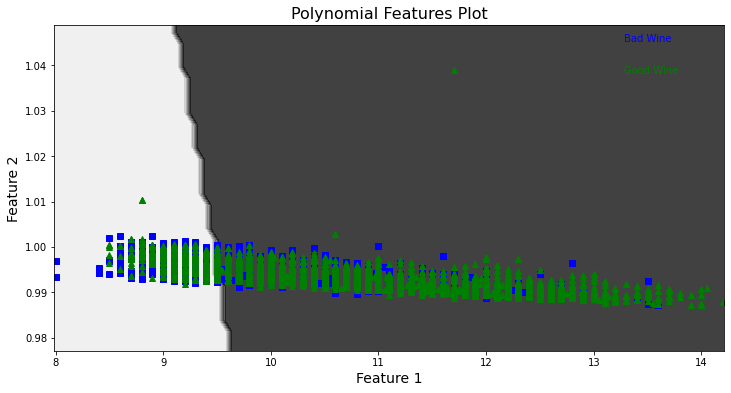


Train Accuracy:  0.6949974476773865
-----------------------------------------

Test Accuracy:  0.6969387755102041

Test Confusion Matrix:
[[138 183]
 [114 545]]

Test Precision = 0.748626
Test Recall = 0.827011
Test F1 Score = 0.785869

Classification Report:
              precision    recall  f1-score   support

           0       0.55      0.43      0.48       321
           1       0.75      0.83      0.79       659

    accuracy                           0.70       980
   macro avg       0.65      0.63      0.63       980
weighted avg       0.68      0.70      0.69       980



In [232]:
polynomial_report("alcohol", "density")

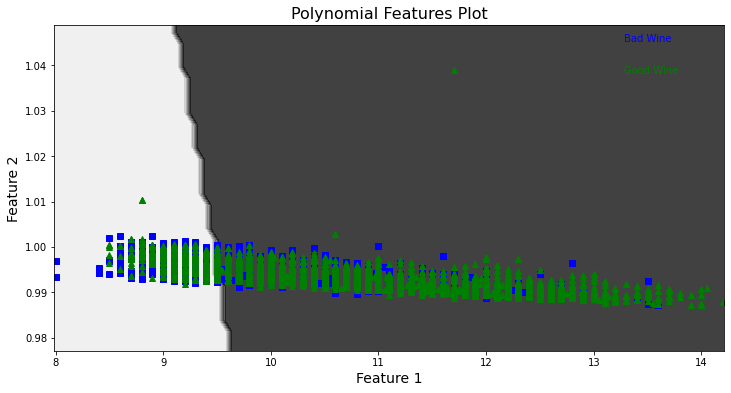

In [233]:
plot_boundary_clf(lg_reg_clf, eff_X)

In [234]:
lg_reg_clf.coef_

array([[-1.22069375,  0.1796257 ,  0.07844577,  0.42135639,  0.36430415]])

In [259]:
test = pd.DataFrame()
alcohol = 9.2
density = 1.04
test['a'] = [alcohol]
test['b'] = [density]
test['c'] = [alcohol**2]
test['d'] = [alcohol*density]
test['e'] = [density**2]
lg_reg_clf.predict(test)

array([1])